
# **Завдання 1**:
Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import matplotlib
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("medical-charges.csv")

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Solution
 Proposed Steps for Analysis of the Dataset and Prediction of charges (using only analytics and previous methods in course):

1.	**Data Consistency and Missing Values Check**
-	Examine the dataset for inconsistencies, such as invalid or missing values, and address these issues through imputation or removal.
2. **Basic Statistics for Continuous Variables**
-	Calculate key statistics (mean, median, standard deviation, etc.) for continuous variables (age, bmi, charges) to understand their distributions.
3. Outlier Analysis
- Identify and analyze outliers in the data, particularly for bmi, age, and charges, to assess their impact on predictions.
4.	Group-wise Average Analysis
- 	Group the data by categorical variables (smoker, sex, region) and calculate the average charges for each group to understand group-level trends.
5.	Visual Analytics
-	Create visualizations such as histograms, boxplots, or bar charts to compare the distribution of charges with feature distributions.
- Compare target (charges) distributions across different categories (smoker, region, etc.).
6.	Correlation Analysis for Continuous Variables
-	Analyze correlations between continuous variables (bmi, age, children) and charges to identify significant predictors.
7.	Correlation Analysis for Categorical Variables
- Perform one-hot encoding for categorical variables (sex, smoker, region) and analyze their relationships with charges using statistical tests or visualizations.

# **Завдання 2**:
Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по диcкретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

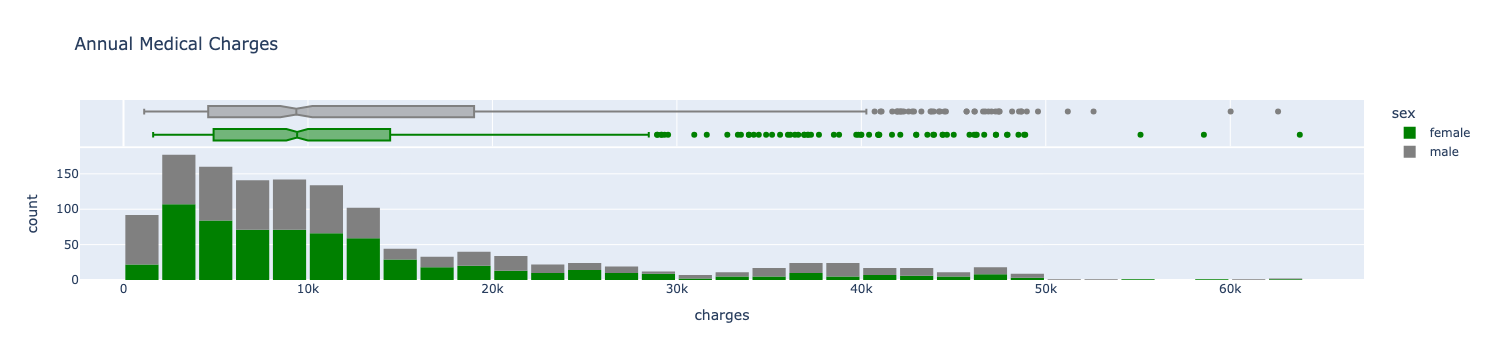

In [10]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

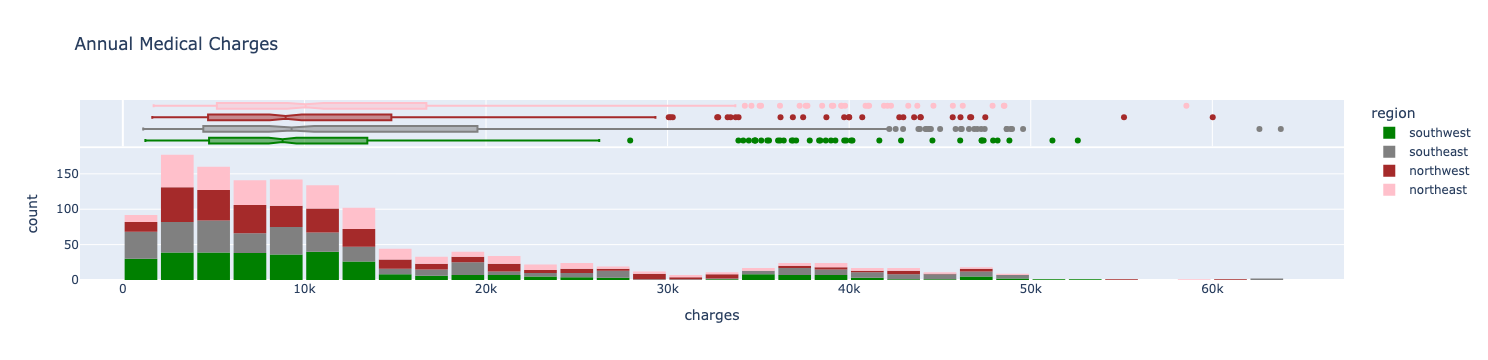

In [11]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'brown','pink'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Solution
**Sex category:**  
- The medians are close, but males have a higher upper fence (40k) than females (28k). The distribution of charges is more right-skewed for males than for females.

**Region category:**
- Charge distributions are close, but the Northeast has a higher median (10k) than the others.

# **Завдання 3**: 

Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

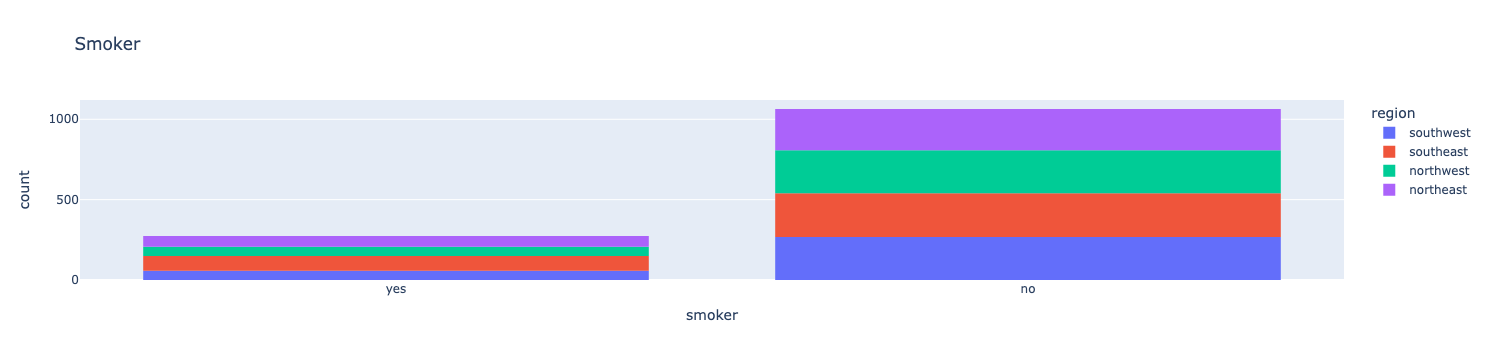

In [12]:
px.histogram(df, x='smoker', color='region', title='Smoker')

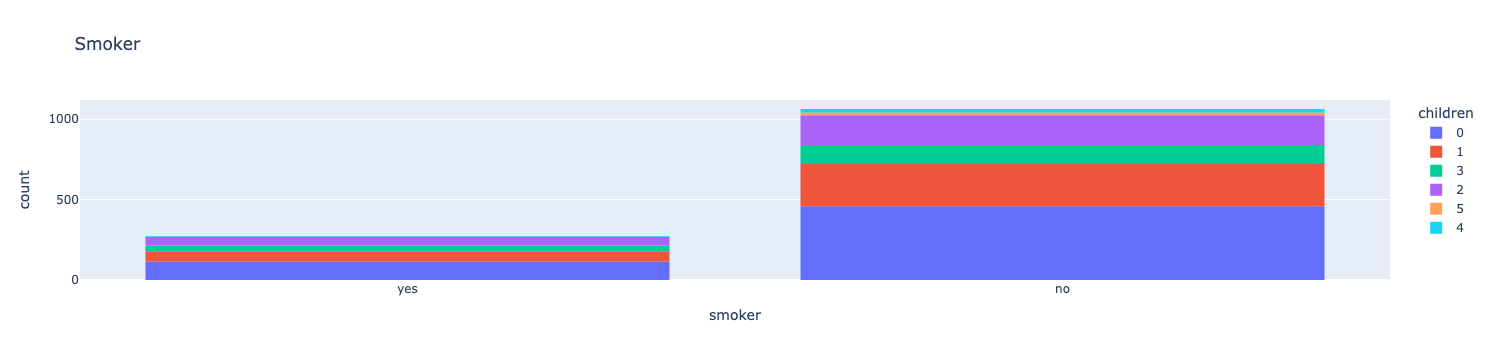

In [13]:
px.histogram(df, x='smoker', color='children', title='Smoker')

### Solution

Looks like Smokers are independently distributed among region and children categories

# **Завдання 4**:
Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

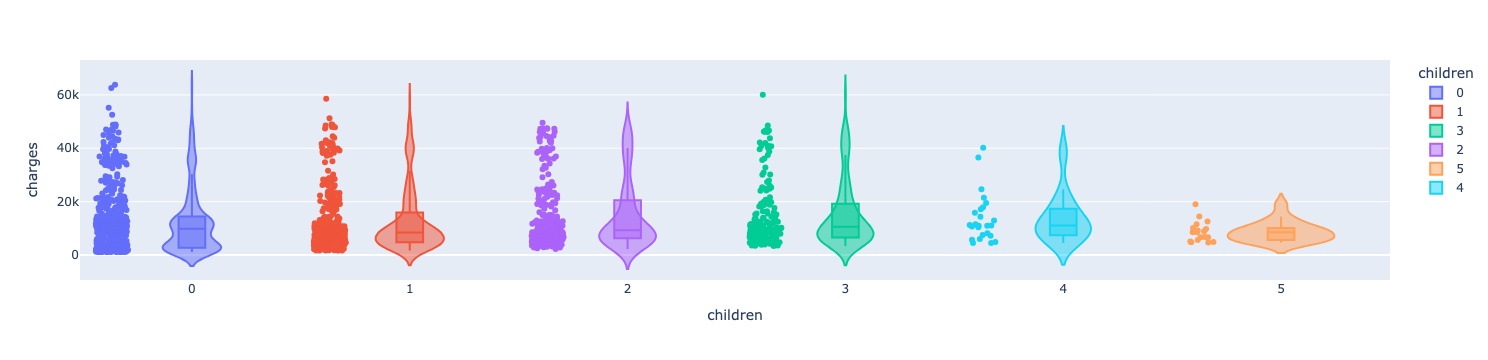

In [46]:
# Create the violin plot
fig = px.violin(df, y="charges", x="children", color="children", box=True, points="all",
                hover_data=df.columns)

# Display the plot
fig.show()

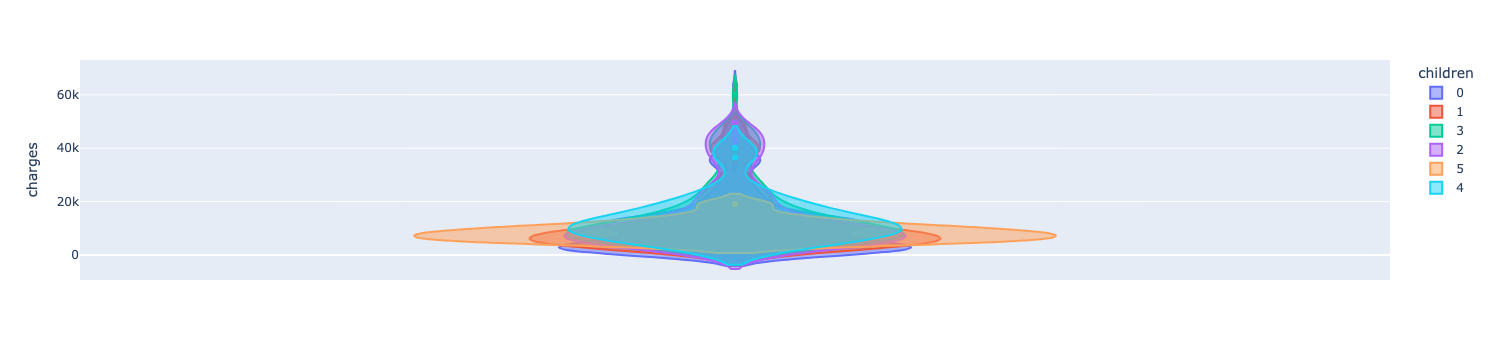

In [15]:
fig = px.violin(df, y="charges", color="children",
                violinmode='overlay', # draw violins on top of each other
                # default violinmode is 'group' as in example above
                hover_data=df.columns)
fig.show()


### Solution

The median charges appear relatively consistent across different numbers of children, suggesting that the number of children does not significantly influence median medical charges.  However, individuals with 0 or 1 child may experience a slightly higher likelihood of outlier charges

# **Завдання 5:** 
Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [16]:
medical_df = df

In [17]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [18]:
def estimate_charges(age, w, b):
    return w * age + b

In [19]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

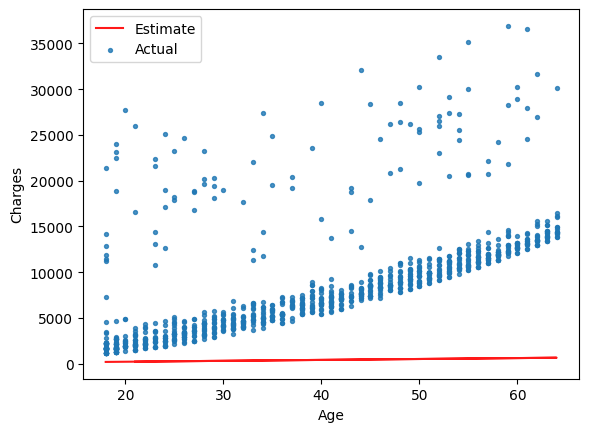

In [35]:
try_parameters(non_smoker_df, 10, 10)

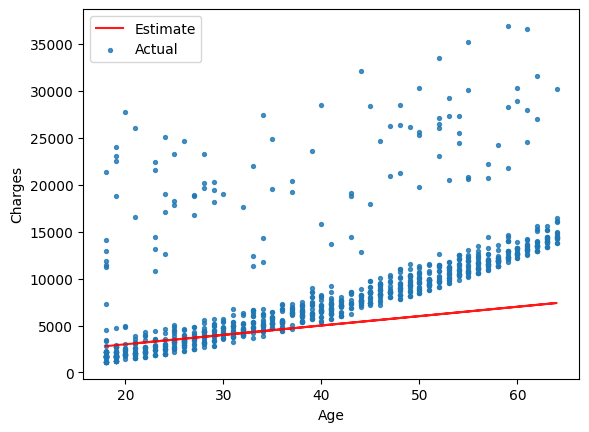

In [36]:
try_parameters(non_smoker_df, 100, 1000)

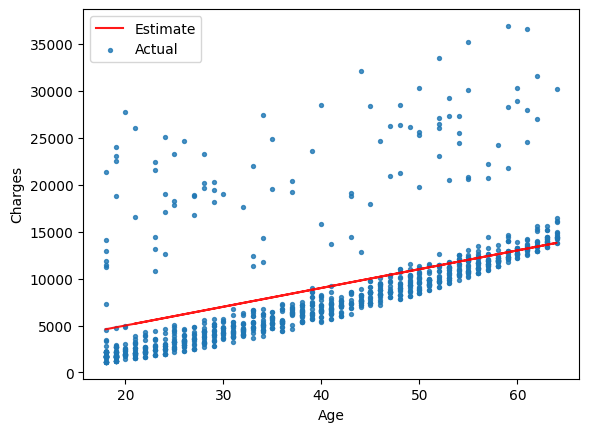

In [37]:
try_parameters(non_smoker_df, 200, 1000)

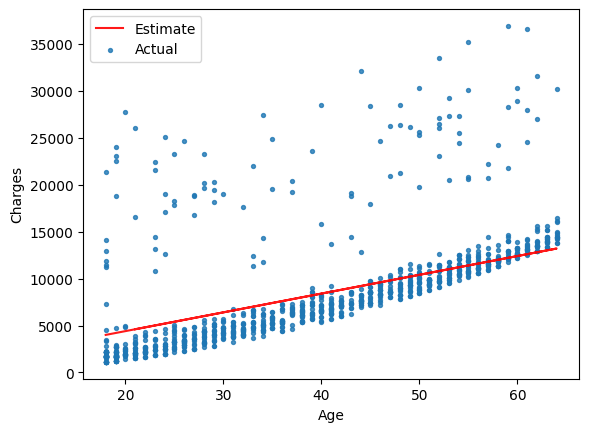

In [38]:
try_parameters(non_smoker_df, 200, 400)

### Solution
Manually finding suitable parameters for the model can be challenging.

# **Завдання 6:** 
Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [39]:
def rmse(df, w, b):
    ages = df.age
    target = df.charges
    estimated_charges = estimate_charges(ages, w, b)

    y_actual = np.array(target)
    y_predicted = np.array(estimated_charges)

    rmse =  ( ( (y_predicted - y_actual) ** 2).mean()) ** 0.5
    
    return rmse     

In [54]:
print('For parameters 10 for weight and 10 for bias, RMSE is equal:', rmse(non_smoker_df, 10, 10))
print('For parameters 100 for weight and 1000 for bias, RMSE is equal:', rmse(non_smoker_df, 100, 1000))
print('For parameters 200 for weight and 1000 for bias, RMSE is equal:', rmse(non_smoker_df, 200, 1000))
print('For parameters 200 for weight and 400 for bias, RMSE is equal:', rmse(non_smoker_df, 200, 400))

For parameters 10 for weight and 10 for bias, RMSE is equal: 9966.940134999095
For parameters 100 for weight and 1000 for bias, RMSE is equal: 6285.060000725581
For parameters 200 for weight and 1000 for bias, RMSE is equal: 4778.197917926803
For parameters 200 for weight and 400 for bias, RMSE is equal: 4760.232777638082


### Solution
The Lowest RMSE is 4760.

The strategy for finding better parameter pairs can be as follows: start with a good initial guess based on the plot, then update the slope and bias according to the distribution, aiming to reduce the residuals for all points.